# Introduction to Industrial Robotics:
# UR3 robot control and Computer Vision

Dima Mironov

dima.mironov@skoltech.ru

github.com/okdimok/waste_sorting (last update was made today;)

<img src="presentation/setup_picture.jpg" alt="setup" style="height: 400px;"/>

## Universal Robot Control
### Imports

In [8]:
#we import libraries to access third-party functions. Like #include <stdio> in C++
import urx #The UR library. $ pip install urx
import time, pickle #standard pythonic things. #pickle is used to save objects to disk
import numpy as np #numpy is for computing in python
import math3d as m3d #the library, used by urx to represent transformations

In [5]:
#for the cool slides
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'scroll': True,
})

{'scroll': True}

In Jupyter Notebook, use `Shift+Enter` to execute cell.

Use `Tab` to get input autocompletion. Try typing `np.save` and than pressing `Tab`, for example.

`B` to create an empty cell below the selected one.

`Ctrl+Shift+P` to get an search prompt for jupyter notebook functions.

Use `Shift+Tab` to get some info on the function, when inside parantheses. (The more times you press, the more info you have)

In [290]:
#You need to share your connection to the robot, and enable DHCP on your PC
#Or you can set up different static IP addresses on the robot and on your PC
#Use ping <robot_ip> in your terminal to check the setup
robot = urx.Robot("10.42.0.162", use_rt=True)

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 45
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 69
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1093
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1418


<div class="images" style="width:100%;overflow:auto;"><img src="presentation/UR_9.jpg" alt="setup" style="height: 400px;float:left;"/><img src="presentation/UR_8.jpg" alt="setup" style="height: 400px;float:left;"/><div style="float:left;"> </div></div>

UR has some digital inputs and outputs. The logical voltage is 24V.


One can control that through the robot interface.

We have a small vacuum pump, connected to the digital output #0 of the robot.

Guess what is this code doing.

Try `Shift+Tab` inside parantheses to learn, what do the arguments of the function mean.

In [ ]:
robot.set_digital_out(0, 1)
time.sleep(1)
robot.set_digital_out(0, 0)

Check Installation tab of the robot PolyScope, TCP stands for tool central point

In [297]:
robot.set_tcp((0, 0, 0.05, 0, 0, 0)) 

What are the 6 numbers?

6 degrees of freedom

3 for translation and 3 for rotation

<img src="presentation/tcp.jpg" alt="setup" style="height: 400px;float:left;"/>

Relationship between two Cartesian coordinate systems in $\mathbb R^3$.

* New basis vectors in the old basis.
* SO(3) — Special Orthogonal Group. 3 is obvious, what about other symbols?

* Orthogonal, because it is rotation

* Special, because no mirroring

Assume you have a rotation matrix $R_{ij}$. Write down the constraints.

In [294]:
#be carefull! This really moves the robot! Guess the units and the variables
#Shift+Tab to help you
robot.translate((0.05, 0, 0.), acc=0.05, vel=0.05) #acceleration, velocity

Robot not running: {'size': 46, 'type': 0, 'timestamp': 300496000, 'isRobotConnected': True, 'isRealRobotEnabled': True, 'isPowerOnRobot': True, 'isEmergencyStopped': False, 'isSecurityStopped': True, 'isProgramRunning': False, 'isProgramPaused': True, 'robotMode': 7, 'controlMode': 0, 'speedFraction': 1.0, 'speedScaling': 1.0}


<Transform:
<Orientation: 
array([[-0.90961476,  0.4152014 ,  0.01444904],
       [ 0.41387297,  0.90863782, -0.05555609],
       [-0.03619591, -0.04455458, -0.99835101]])>
<Vector: (0.31465, -0.37761, 0.26932)>
>

Why do we have a matrix of 9 elements here?

In [42]:
#moves the robot in the TCP coodinate system
robot.translate_tool((0, 0, 0.03), acc=0.05, vel=0.05)

<Transform:
<Orientation: 
array([[ -7.06934145e-01,  -7.07279349e-01,  -1.93678685e-04],
       [ -7.07279350e-01,   7.06934167e-01,  -7.33670102e-05],
       [  1.88809051e-04,   8.51192899e-05,  -9.99999979e-01]])>
<Vector: (0.18844, 0.11129, 0.30946)>
>

In [43]:
robot.get_pose() #rotation matrix + position

<Transform:
<Orientation: 
array([[ -7.06968147e-01,  -7.07245366e-01,   1.77102959e-04],
       [ -7.07245387e-01,   7.06968137e-01,  -1.21884234e-04],
       [ -3.90040894e-05,  -2.11423521e-04,  -9.99999977e-01]])>
<Vector: (0.18846, 0.11128, 0.30951)>
>

In [44]:
robot.get_pos() #just position

<Vector: (0.18845, 0.11128, 0.30949)>

In [45]:
robot.getl() #position + rotation vector (see https://en.wikipedia.org/wiki/Axis%E2%80%93angle_representation)

[0.18844639047179304,
 0.11128505741645678,
 0.30950237070627684,
 -1.2025131553746746,
 2.902220217720705,
 -0.0002166425235109268]

In [390]:
#defining obvious functions
def save_current_pos(fname):
    p = robot.getl()
    np.savetxt("pos/" + fname, np.array(p))
       

def move_to_pos(fname, *args, **kwargs):
    p = np.loadtxt("pos/" + fname)
    robot.movel(p, *args, **kwargs)
    
def print_pos(fname):
    p = np.loadtxt(fname)
    print(p)
    

In [25]:

# save_current_pos('take_photo')

In [42]:
def move_x_y(x, y):
    p = np.array(robot.getl())
    p[0] = x
    p[1] = y
    robot.movel(p, vel=0.05, acc=0.05)

In [ ]:
move_to_pos("in", vel=0.05, acc=0.05)

In [ ]:
robot.getl()

In [ ]:
robot.x += 0.01 #1 hour 10 minutes up to this point for me ;)

In [ ]:
p = robot.get_pos()

In [ ]:
p.array

In [ ]:
m3d.Vector(p.array)

In [349]:
#This is a magic code to display the force on the TCP online
import threading
from IPython.display import display
import ipywidgets as widgets
import time

fw = widgets.HTML(
    value='',
    placeholder='No data',
    description='Force:',
)

def observe_force(fw):
    while True:
        fw.value = "<br>".join(["{0:5} {1:7.3f}".format(*c) for c in 
                                zip("x y z rx ry rz".split(), robot.get_tcp_force())])

thread = threading.Thread(target=observe_force, args=(fw,))
display(fw)
thread.start()



In [387]:
#also important function
def observe_force_mean(number=100):
    global force
    while True:
        force = robot.get_tcp_force()
        for i in range(number):
            force = np.vstack((force, robot.get_tcp_force()))
        force_mean = force.mean(axis=0)
        force_std = force.std(axis=0)
        print ("\n".join(["{0:5} {1:7.3f}".format(*c) for c in 
                                zip("x y z rx ry rz".split(), force_mean)]))
        print ("="*20)
            

## Here starts CV

In [6]:
%matplotlib notebook

import cv2 #see the comments below
import matplotlib.pyplot as plt
import signal, datetime, time 
import numpy as np
from numpy import linalg
#to check: cv2.getBuildInformation()
print (*filter(lambda s: "FFMPEG" in s, cv2.getBuildInformation().split("\n"))) 
print (*filter(lambda s: "V4L" in s, cv2.getBuildInformation().split("\n"))) #video 4 linux

#To install opencv with ffmpeg in conda
#https://github.com/conda-forge/opencv-feedstock/
#pip uninstall opencv
#pip uninstall opencv-python
#conda unistall opencv
#conda install conda=4.0.11
#conda config --add channels conda-forge
#conda install opencv

#modern way: conda env create -n waste_sorting -f conda_environment.yml


    FFMPEG:                      YES
    V4L/V4L2:                    YES/YES


In [303]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

In [9]:
%%bash
#v4l devices
ls -d -1 /dev/* | grep video

/dev/video0
/dev/video1


In [12]:
vc = cv2.VideoCapture("/dev/video1") #0 for the first webcam, 1 for the second. This is V4L
# vc = cv2.VideoCapture(0) if you have YES in FFMPEG

# remove the gstreamer from yml for the sake of Mac
# next time docker....

In [16]:
def imshow(frame, from_color_space='bgr'): #show a picture from webcam
    plt.figure()
    if from_color_space == 'bgr':
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    elif from_color_space == 'hsv':
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_HSV2RGB)    # makes the hsv image look real colored
    else:
        rgb_frame=frame
    return plt.imshow(rgb_frame)

In [17]:
def online_view(): #always update a picture from webcam
    if vc.isOpened(): # try to get the first frame
        is_capturing, frame = vc.read()
        webcam_preview = imshow(frame)   
    else:
        is_capturing = False

    signal.signal(signal.SIGINT, signal_handler)
    is_interrupted = False
    while is_capturing:
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        webcam_preview.set_data(frame)
        plt.draw()

        try:    # Avoids a NotImplementedError caused by `plt.pause`
            plt.pause(0.05)
        except Exception:
            pass
        if is_interrupted:
            vc.release()
            break

In [18]:
def get_frame(): #get a picture from webcam
    timeout = time.time() + 0.1
    while time.time() < timeout:
        if vc.isOpened(): # try to get the first frame
            is_capturing, frame = vc.read()
        else:
            raise (Exception("Unable to capture"))
    cv2.imwrite("/tmp/frame_{}.png".format(datetime.datetime.now()), frame)
    return frame

<IPython.core.display.Javascript object>


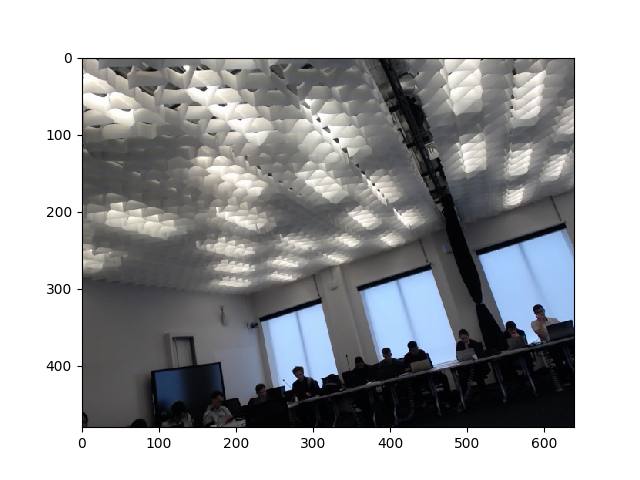

In [21]:
imshow(get_frame())
#online_view()

In [172]:
# online_view()

### The blob detection

In [181]:
move_to_pos('take_photo', acc=0.05, vel=0.05)

<img src="presentation/HSV.png" alt="hsv cylinder" style="width:70%;"/>
Usually $h \in [0, 360], s \in [0, 100], v \in [0, 100]$<br>
In OpenCV $h \in [0, 255] \cap \mathbb N, s \in [0, 255] \cap \mathbb N, v \in [0, 255] \cap \mathbb N$. Why?<br>

### Gaussian Blur
<img src="presentation/blur_1.png" alt="gaussian blur" style="width:50%;float:left;"/>
<img src="presentation/blur_2.jpg" alt="gaussian blur" style="width:50%;float:left;"/>

Removes noise.


### Contours — cool OpenCV magic!


<dl class="pyoldfunction" style="align:left;">
<dt id="cv.FindContours">
<strong>Python:</strong><code class="descname"> </code><code class="descclassname">cv.</code><code class="descname"><span class="highlighted">FindCo</span>ntours</code><span class="sig-paren">(</span>image, storage, mode=CV_RETR_LIST, method=CV_CHAIN_APPROX_SIMPLE, offset=(0, 0)<span class="sig-paren">)</span> → contours<a class="headerlink" href="#cv.FindContours" title="Permalink to this definition">¶</a></dt>
<dd><table class="docutils field-list" frame="void" rules="none" style="text-align:left;">
<colgroup><col class="field-name">
<col class="field-body">
</colgroup><tbody valign="top">
<tr class="field-odd field"><th class="field-name">Parameters:</th><td class="field-body"><ul class="first last simple" style="text-align:left;">
<li><strong>image</strong> – Source, an 8-bit single-channel image. Non-zero pixels are treated as 1’s. Zero pixels remain 0’s, so the image is treated as  <code class="docutils literal"><span class="pre">binary</span></code> . You can use  <a class="reference internal" href="../../contrib/doc/openfabmap.html#void compare(const Mat&amp; queryImgDescriptor, vector&lt;IMatch&gt;&amp; matches, bool addQuery , const Mat&amp; mask)" title="void compare(const Mat&amp; queryImgDescriptor, vector<IMatch>&amp; matches, bool addQuery , const Mat&amp; mask)"><code class="xref ocv ocv-func docutils literal"><span class="pre">compare()</span></code></a> ,  <a class="reference internal" href="../../core/doc/operations_on_arrays.html#void inRange(InputArray src, InputArray lowerb, InputArray upperb, OutputArray dst)" title="void inRange(InputArray src, InputArray lowerb, InputArray upperb, OutputArray dst)"><code class="xref ocv ocv-func docutils literal"><span class="pre">inRange()</span></code></a> ,  <a class="reference internal" href="miscellaneous_transformations.html#double threshold(InputArray src, OutputArray dst, double thresh, double maxval, int type)" title="double threshold(InputArray src, OutputArray dst, double thresh, double maxval, int type)"><code class="xref ocv ocv-func docutils literal"><span class="pre">threshold()</span></code></a> ,  <a class="reference internal" href="miscellaneous_transformations.html#void adaptiveThreshold(InputArray src, OutputArray dst, double maxValue, int adaptiveMethod, int thresholdType, int blockSize, double C)" title="void adaptiveThreshold(InputArray src, OutputArray dst, double maxValue, int adaptiveMethod, int thresholdType, int blockSize, double C)"><code class="xref ocv ocv-func docutils literal"><span class="pre">adaptiveThreshold()</span></code></a> ,  <a class="reference internal" href="feature_detection.html#void Canny(InputArray image, OutputArray edges, double threshold1, double threshold2, int apertureSize, bool L2gradient)" title="void Canny(InputArray image, OutputArray edges, double threshold1, double threshold2, int apertureSize, bool L2gradient)"><code class="xref ocv ocv-func docutils literal"><span class="pre">Canny()</span></code></a> , and others to create a binary image out of a grayscale or color one. The function modifies the  <code class="docutils literal"><span class="pre">image</span></code>  while extracting the contours. If mode equals to <code class="docutils literal"><span class="pre">CV_RETR_CCOMP</span></code> or <code class="docutils literal"><span class="pre">CV_RETR_FLOODFILL</span></code>, the input can also be a 32-bit integer image of labels (<code class="docutils literal"><span class="pre">CV_32SC1</span></code>).</li>
<li><strong>contours</strong> – Detected contours. Each contour is stored as a vector of points.</li>
<li><strong>hierarchy</strong> – Optional output vector, containing information about the image topology. It has as many elements as the number of contours. For each i-th contour  <code class="docutils literal"><span class="pre">contours[i]</span></code> , the elements  <code class="docutils literal"><span class="pre">hierarchy[i][0]</span></code> ,  <code class="docutils literal"><span class="pre">hiearchy[i][1]</span></code> ,  <code class="docutils literal"><span class="pre">hiearchy[i][2]</span></code> , and  <code class="docutils literal"><span class="pre">hiearchy[i][3]</span></code>  are set to 0-based indices in  <code class="docutils literal"><span class="pre">contours</span></code>  of the next and previous contours at the same hierarchical level, the first child contour and the parent contour, respectively. If for the contour  <code class="docutils literal"><span class="pre">i</span></code>  there are no next, previous, parent, or nested contours, the corresponding elements of  <code class="docutils literal"><span class="pre">hierarchy[i]</span></code>  will be negative.</li>
<li><strong>mode</strong> – <p>Contour retrieval mode (if you use Python see also a note below).</p>
<ul>
<li><strong>CV_RETR_EXTERNAL</strong> retrieves only the extreme outer contours. It sets  <code class="docutils literal"><span class="pre">hierarchy[i][2]=hierarchy[i][3]=-1</span></code>  for all the contours.</li>
<li><strong>CV_RETR_LIST</strong> retrieves all of the contours without establishing any hierarchical relationships.</li>
<li><strong>CV_RETR_CCOMP</strong> retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.</li>
<li><strong>CV_RETR_TREE</strong> retrieves all of the contours and reconstructs a full hierarchy of nested contours. This full hierarchy is built and shown in the OpenCV  <code class="docutils literal"><span class="pre">contours.c</span></code>  demo.</li>
</ul>
</li>
<li><strong>method</strong> – <p>Contour approximation method (if you use Python see also a note below).</p>
<ul>
<li><strong>CV_CHAIN_APPROX_NONE</strong> stores absolutely all the contour points. That is, any 2 subsequent points <code class="docutils literal"><span class="pre">(x1,y1)</span></code> and <code class="docutils literal"><span class="pre">(x2,y2)</span></code> of the contour will be either horizontal, vertical or diagonal neighbors, that is, <code class="docutils literal"><span class="pre">max(abs(x1-x2),abs(y2-y1))==1</span></code>.</li>
<li><strong>CV_CHAIN_APPROX_SIMPLE</strong> compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.</li>
<li><strong>CV_CHAIN_APPROX_TC89_L1,CV_CHAIN_APPROX_TC89_KCOS</strong> applies one of the flavors of the Teh-Chin chain approximation algorithm. See  <a class="reference internal" href="#tehchin89" id="id2">[TehChin89]</a> for details.</li>
</ul>
</li>
<li><strong>offset</strong> – Optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context.</li>
</ul>
</td>
</tr>
</tbody>
</table>
</dd></dl>

In [22]:
#this is all the computer vision magic! Use verbose=2 to understand it;)
def find_colored_cubes_centers_pixels(colorMin, colorMax, blur=40, verbose=0):
    # Read image
    # im = cv2.imread("detection/cubes_4.png")
    im = get_frame()
    cv2.imwrite('test.png', im)

    if verbose > 0: imshow(im)

    # Blur image to remove noise
    im = cv2.GaussianBlur(im, (5,5), blur)

    if verbose > 2: imshow(im)

    hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

    #greenMin = (30, 90, 120) #./range-detector.py -i test.png -f HSV
    #greenMax = (150, 255, 255)

    # Sets pixels to white if in purple range, else will be set to black
    mask = cv2.inRange(hsv, colorMin, colorMax)

    # Bitwise-AND of mask and purple only image - only used for display
    masked = cv2.bitwise_and(im, im, mask= mask)

    if verbose > 2: imshow(masked)

    # dilate makes the in range areas larger
    mask = cv2.erode(mask, None, iterations=5)

    # mask = cv2.dilate(mask, None, iterations=8)


    # Bitwise-AND of mask and purple only image - only used for display
    masked = cv2.bitwise_and(im, im, mask= mask)

    if verbose > 1: imshow(masked)
    pts = []

    # find contours in the mask and initialize the current
    # (x, y) center of the ball
    cnts = cv2.findContours(mask.copy(), cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[-2]
    center = None

    if verbose > 1: print (len(cnts))

    # only proceed if at least one contour was found
    for c in cnts:
        # find the largest contour in the mask, then use
        # it to compute the minimum enclosing circle and
        # centroid
    #     c = max(cnts, key=cv2.contourArea)
        (circle_center, radius) = cv2.minEnclosingCircle(c)

        # only proceed if the radius meets a minimum size
        if radius > 25 and radius < 200:
            if verbose > 1: print (radius)

            M = cv2.moments(c)
            center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
            if center[1] > 400:
                continue
            # draw the circle and centroid on the frame,
            # then update the list of tracked points
            circle_center_int = tuple(map(int, circle_center))
            cv2.circle(im, circle_center_int, int(radius),
                (0, 255, 255), 2)
            cv2.circle(im, center, 5, (0, 0, 255), -1)
            cv2.circle(im, circle_center_int, 3,
                (0, 255, 255), -1)

            # update the points queue
            pts.append(circle_center)

    if verbose > 0: imshow(im)
    return pts

<IPython.core.display.Javascript object>


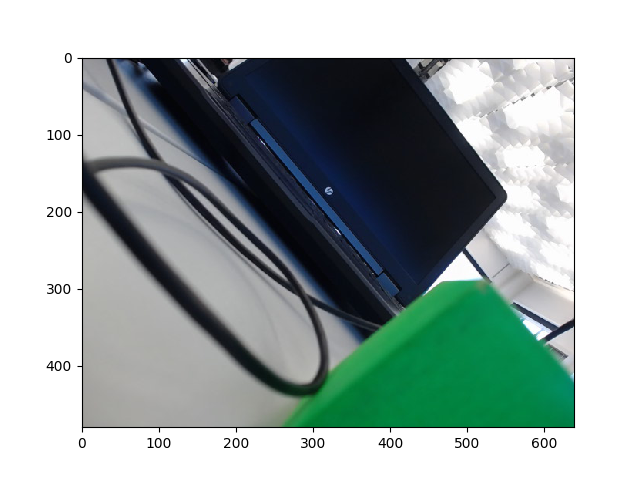

<IPython.core.display.Javascript object>


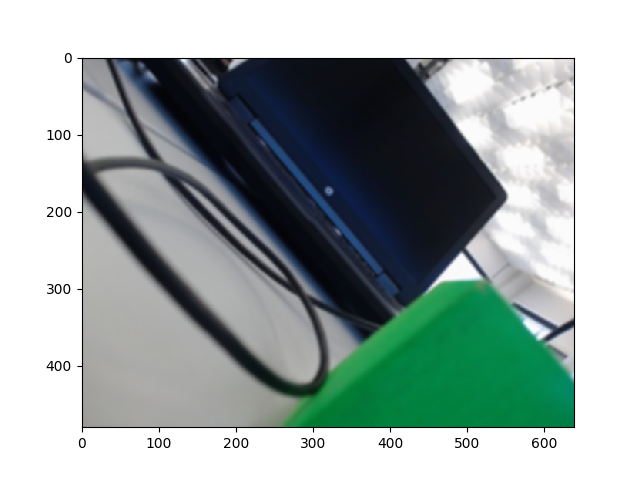

In [23]:
green_min = (30, 75, 186) #./range-detector.py -i test.png -f HSV
green_max = (88, 255, 255)
im = find_colored_cubes_centers_pixels(green_min, green_max, verbose=1)

In [24]:
def find_green_cubes_centers_pixels(*args, **kwargs):
    #maybe you will need to tune these values
    green_min = (30, 75, 186) #./range-detector.py -i test.png -f HSV
    green_max = (88, 255, 255)#
    return find_colored_cubes_centers_pixels(green_min, green_max, *args, **kwargs)

def find_plain_cubes_centers_pixels(*args, **kwargs):
    plain_min = (11, 45, 233) #./range-detector.py -i test.png -f HSV
    plain_max = (176, 93, 255)
    return find_colored_cubes_centers_pixels(plain_min, plain_max, *args, **kwargs)


<IPython.core.display.Javascript object>


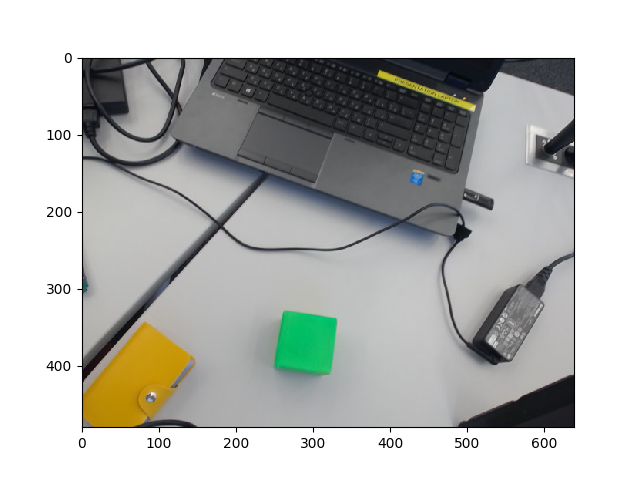

<IPython.core.display.Javascript object>


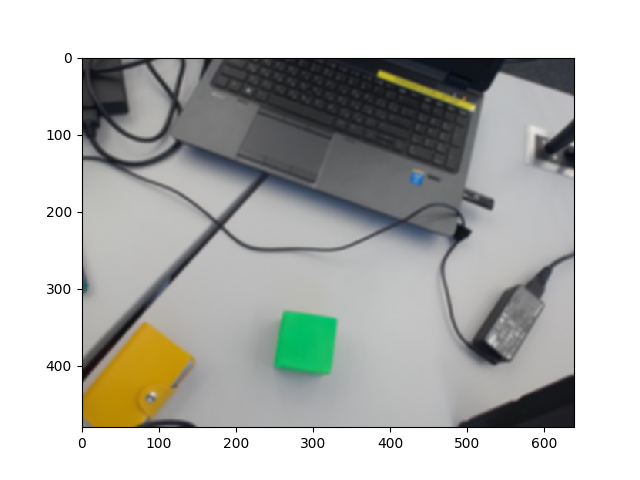

<IPython.core.display.Javascript object>


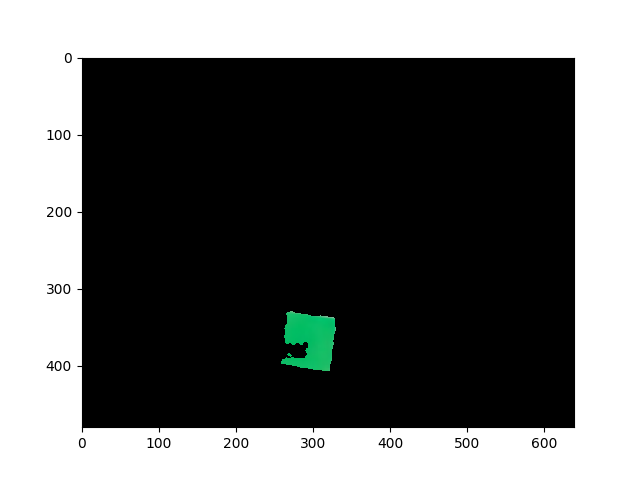

<IPython.core.display.Javascript object>


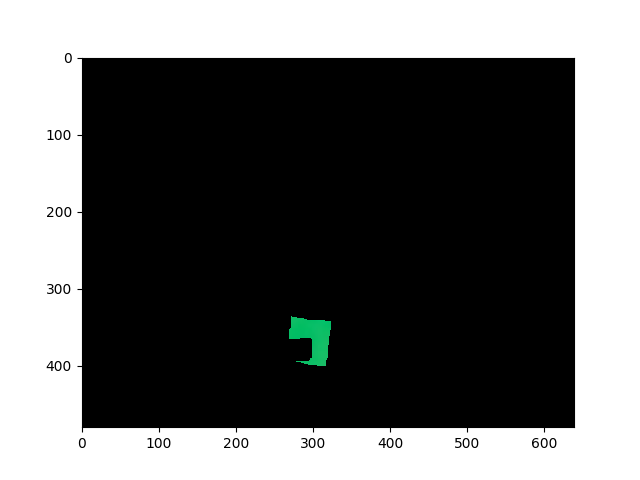

1
39.118507385253906


<IPython.core.display.Javascript object>


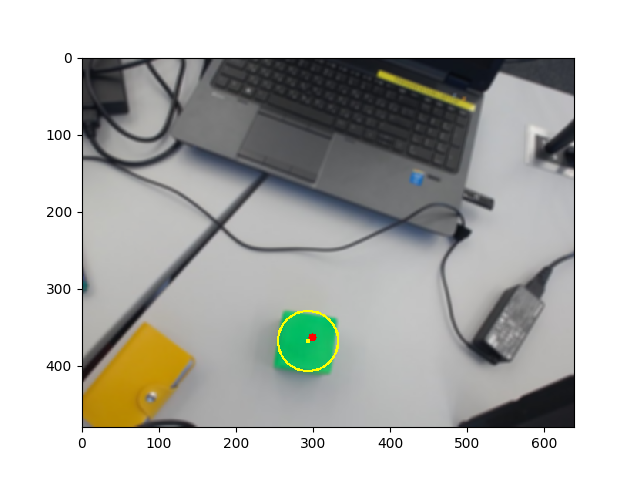

[(293.5, 368.0)]

In [27]:
find_green_cubes_centers_pixels(verbose=3)

In [256]:
# save_current_pos('green')

In [270]:
move_to_pos('take_photo', acc=0.05, vel=0.05)

In [257]:
# save_current_pos('plain')

## Robot and Camera calibration

Distortion picture

In [393]:
class RobotCamera(object):
    def calibrate(self, verbose=0):
        self.calibrate_rotation_and_scale(verbose=verbose)
        self.calibrate_shift(verbose=verbose)
    
    def calibrate_rotation_and_scale(self, verbose=0):
        scale, angle = self.calibrate_once(verbose=verbose)
        
        self.scale, self.angle = scale, angle
        if verbose > 0: print ("scale: {}, angle: {}".format(scale, angle))
        c, s = np.cos(self.angle), np.sin(self.angle)
        self.rotation_matrix = np.array([[-c, s], [s, c]]) #to maintain same orientation
        return self.scale, self.angle
        
    def calibrate_once(self, delta_pos=(0.05, 0, 0), verbose=0):
        """Calibrates the robot-camera scale, and angle between coordinate systems.
        Only one green cube in sight is required.
        
        It takes a photo, detects a green cube, than moves the robot on delta_pos, takes a photo and detects a cube.
        """
        if delta_pos[2] != 0:
            raise NotImplemented
        delta_pos = np.asarray(delta_pos)
        move_to_pos("take_photo", vel=0.05, acc=0.05)
        pos1 = np.array(find_green_cubes_centers_pixels(verbose=verbose)[0])

        robot.translate(delta_pos, acc=0.05, vel=0.05) #acceleration, velocity
        pos2 = np.array(find_green_cubes_centers_pixels(verbose=verbose)[0])
        if verbose > 0: print ("Pos 1: {}\nPos 2: {}\n".format(pos1, pos2))

        delta_pos_pix = (pos2 - pos1)
        
        if verbose > 1: print ("delta_pos_pix: {}\ndelta_pos: {}".format(delta_pos_pix, delta_pos[:2]))

        distance_pixels = linalg.norm(delta_pos_pix)
        distance_space = linalg.norm(delta_pos[:1])

        scale = distance_space/distance_pixels

        complex_pix = delta_pos_pix[0] + 1j*delta_pos_pix[1]
        complex_space = delta_pos[0] + 1j*delta_pos[1]
        #If the vectors are close to 0, that might need to be fixed
        angles = np.angle((complex_pix, complex_space)) #to get phase of comlex numbers.
        return scale, angles[1]-angles[0]
    
    def calibrate_shift(self, verbose=0):
        """Also the translation has to be calibrated. You need to know the correspondence between two points"""
        move_to_pos("take_photo", vel=0.05, acc=0.05)
        pos_pix = np.array(find_green_cubes_centers_pixels(verbose=verbose)[0])
        robot.set_freedrive(1)
        input("Now move the robot head to the green cube. Press Enter to confirm")
        robot.set_freedrive(0)
        pos_space = robot.getl()[:2]
        if verbose > 1: print("pos_space: {}".format(pos_space))
        move_to_pos("take_photo", vel=0.05, acc=0.05)
        
        proposed_coordinates = self.scale*self.rotation_matrix.dot(pos_pix)
        if verbose > 1: print ("proposed_coordinates: {}".format(proposed_coordinates))
        self.shift = pos_space - proposed_coordinates
        if verbose > 0: print ("shift: {}".format(self.shift))
        return self.shift

        

    def get_real_coords(self, point):
        #The main function to transform between the photo pixel coordinates and real world
        return self.scale*self.rotation_matrix.dot(point) + self.shift
    
    def test(self):
        #to tst the calibration
        move_to_pos("take_photo", vel=0.05, acc=0.05)
        cube_pix = find_green_cubes_centers_pixels()[0]
        cube_space = self.get_real_coords(cube_pix)
        print ("cube_pix: {}\ncube_space: {}".format(cube_pix, cube_space))
        p = np.array(robot.getl())
        p[:2] = cube_space[:2]
        p[2] = 0.005
        robot.movel(p, vel=0.05, acc=0.05)

In [394]:
def take_cube(x, y, color):
    move_to_pos("take_photo", vel=0.5, acc=0.2)
    p = np.array(robot.getl())
    p[0] = x
    p[1] = y
    p[2] = 0.015
    robot.set_digital_out(0, 1)
    robot.movel(p, vel=0.5, acc=0.2)
    p[2] = 0.0
    robot.movel(p, vel=0.05, acc=0.2)
    get_frame()
    p[2] = 0.15
    robot.movel(p, vel=0.2, acc=0.1)
    move_to_pos(color, vel=0.5, acc=0.2)
    robot.set_digital_out(0, 0)


def sort():
    while True:
        move_to_pos("take_photo", vel=0.5, acc=0.2)
        green = find_green_cubes_centers_pixels()
        plain = find_plain_cubes_centers_pixels()
        if len(green) == 0 and len(plain) == 0:
            time.sleep(1)
            break
            continue

        take_green = len(green) > len(plain)

        box = green[0] if take_green else plain[0]
        color = 'green' if take_green else 'plain'
        x, y = rc.get_real_coords(box)
        
        take_cube(x, y, color)



<IPython.core.display.Javascript object>


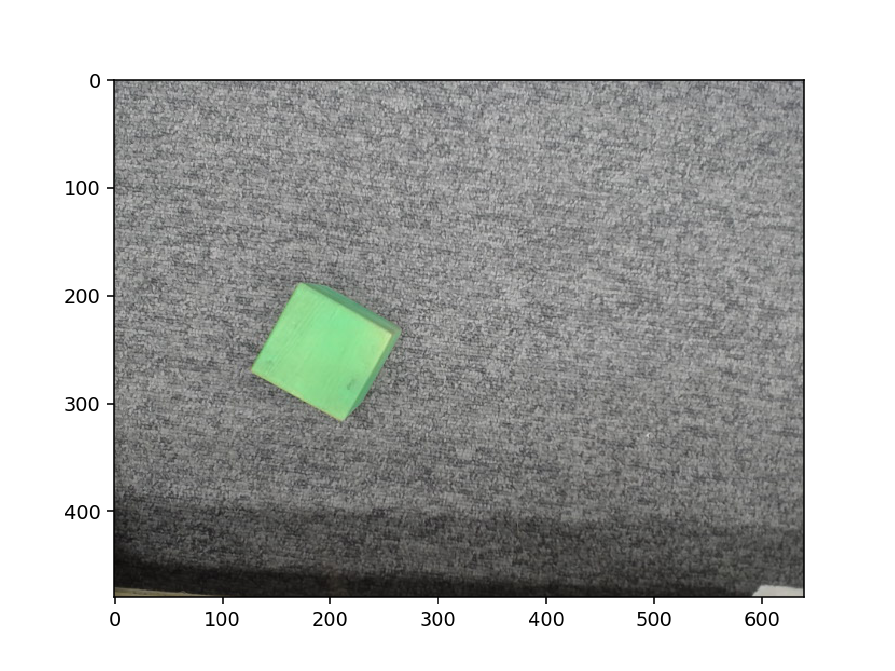

<IPython.core.display.Javascript object>


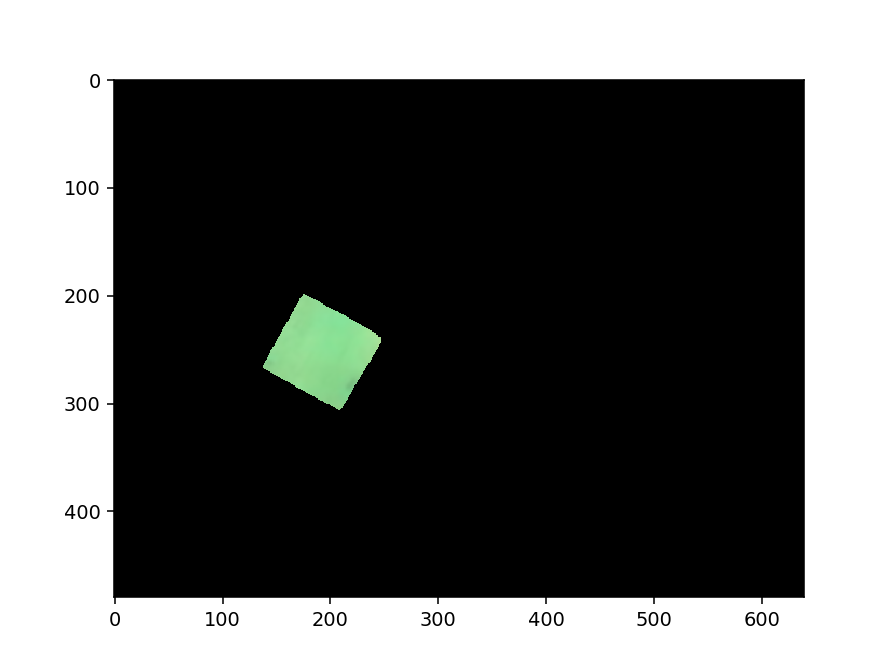

1
56.271705627441406


<IPython.core.display.Javascript object>


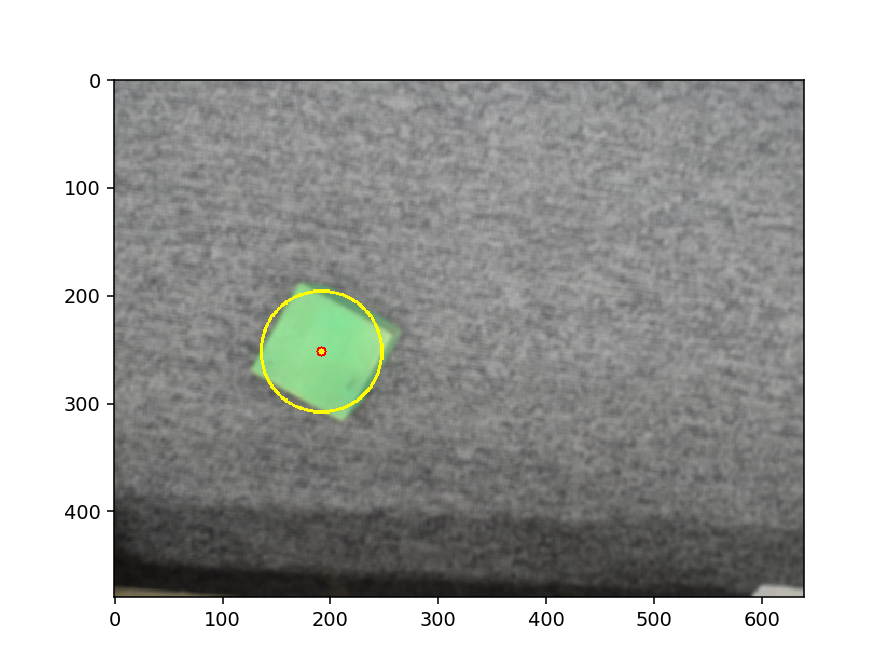

/home/dima/apps/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


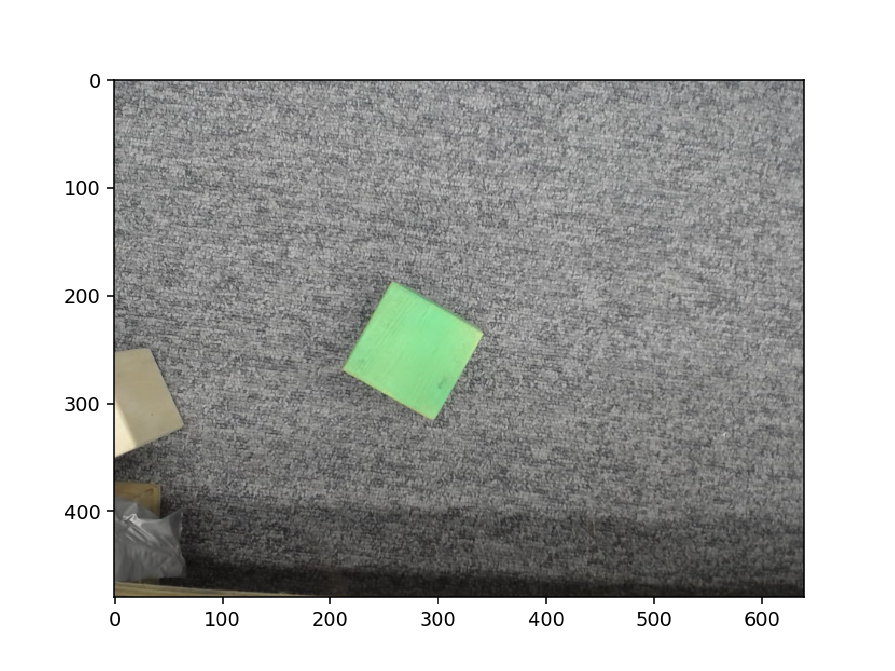

<IPython.core.display.Javascript object>


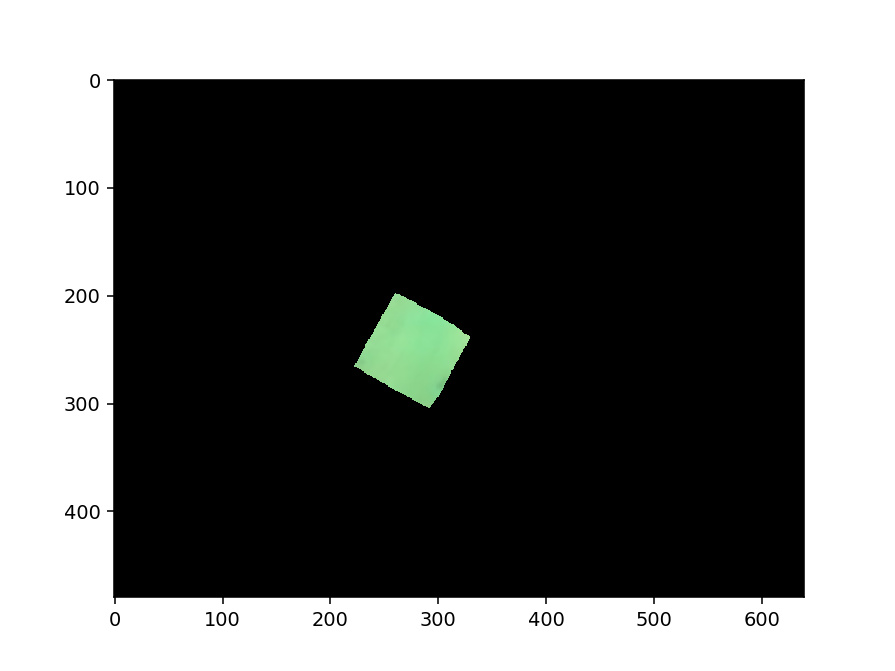

1
55.221168518066406


<IPython.core.display.Javascript object>


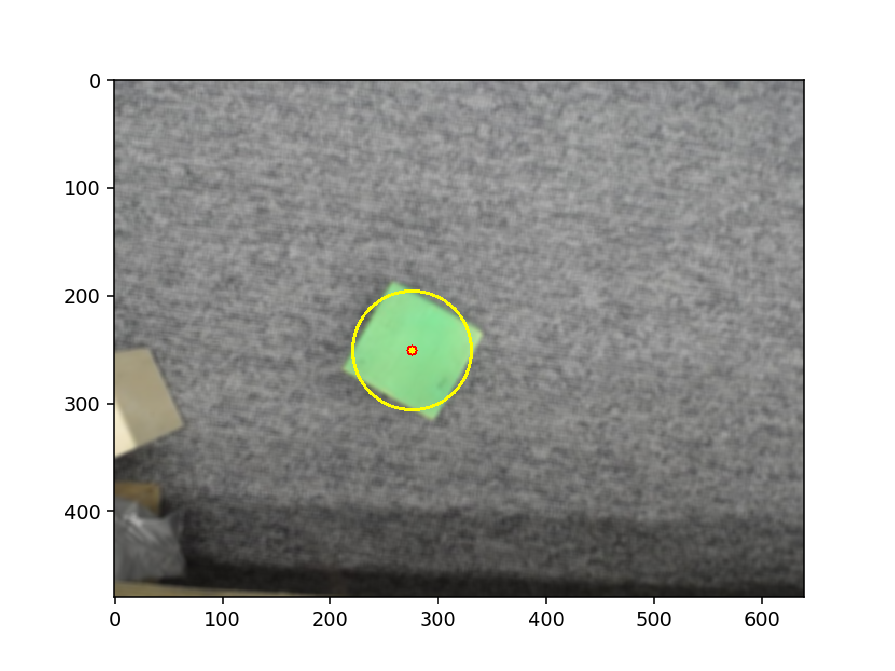

Pos 1: [ 192.37704468  252.52133179]
Pos 2: [ 276.17178345  251.09599304]

delta_pos_pix: [ 83.79473877  -1.42533875]
delta_pos: [ 0.05  0.  ]
scale: 0.0005966098695451604, angle: 0.017008243268843145


<IPython.core.display.Javascript object>


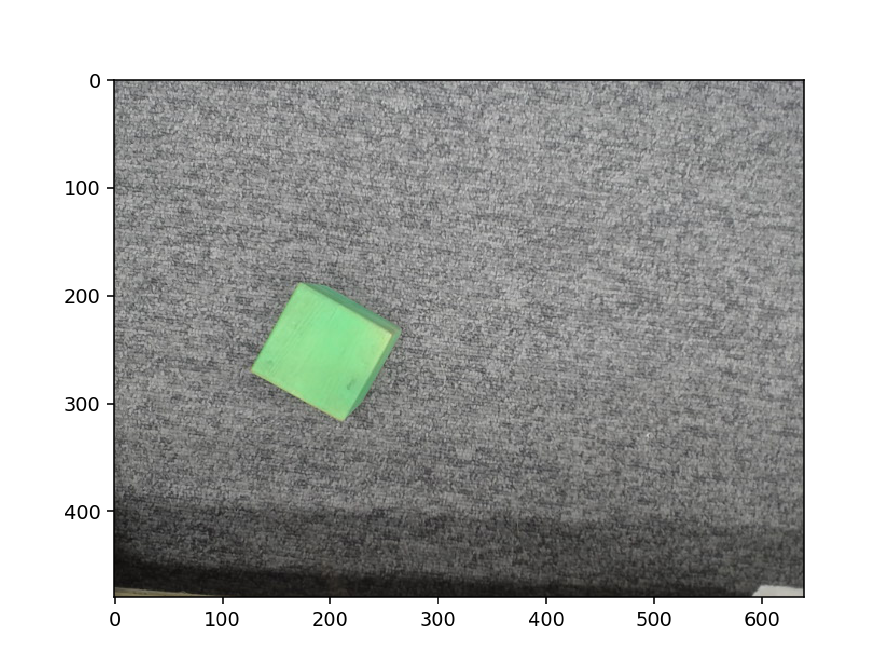

<IPython.core.display.Javascript object>


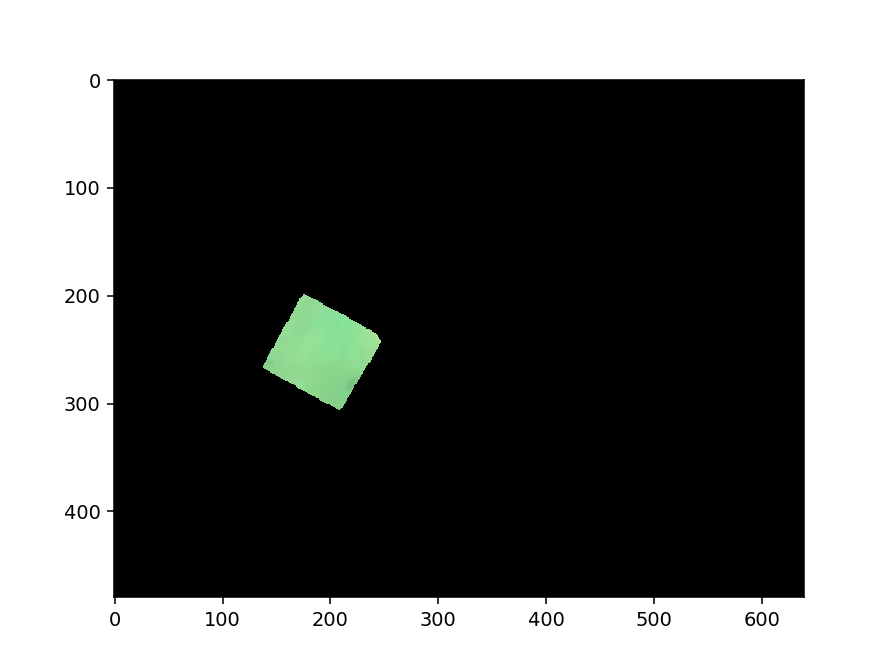

1
56.13609313964844


<IPython.core.display.Javascript object>


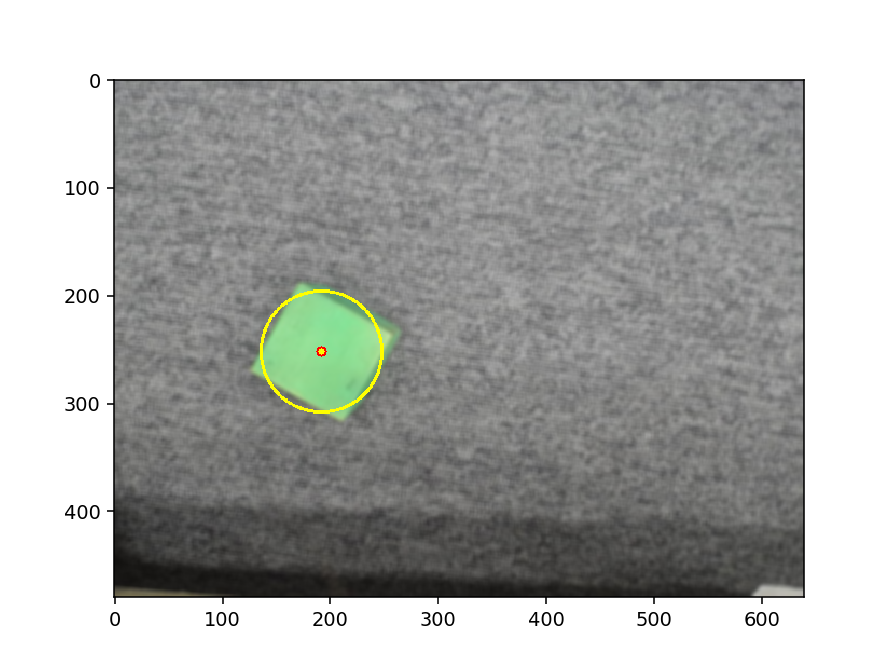

Now move the robot head to the green cube. Press Enter to confirm
pos_space: [0.12167323775030887, -0.3744318455343702]
proposed_coordinates: [-0.11197046  0.15257039]
shift: [ 0.2336437  -0.52700223]


In [283]:
rc = RobotCamera()
rc.calibrate(verbose=2)

In [245]:
robot.getl()

[0.045001042029296376,
 -0.35623486610276106,
 0.2713365330504199,
 -1.2021508063416408,
 -2.902325204618799,
 -0.0003396816072311521]

<IPython.core.display.Javascript object>


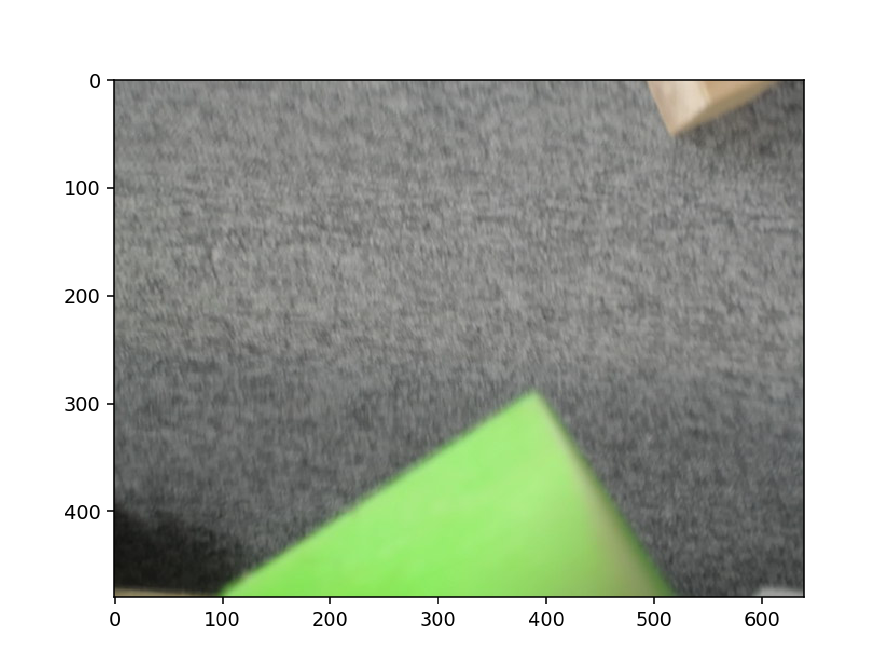

In [348]:
imshow(get_frame())